## KL-Divergence Analysis

In [3]:
import scipy.stats as st
import pandas as pd
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('./sample_selected.csv',index_col = 0)

In [9]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)] 
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)  
    

In [14]:
lt = []
for item in ['F1','F2','F3','B1', 'B2', 'B3',  'F1@20%', 'F2@20%','F1@35%', 'F2@35%', 'F1@50%', 'F2@50%', 'F1@65%', 'F2@65%', 'F1@80%','F2@80%']:

    F1_1 = data[data['label']==1][item]
    F1_2 = data[data['label']==-1][item]
    s1 = np.histogram(F1_1, bins=30,range=(min(F1_1.min(),F1_2.min()), max(F1_1.max(),F1_2.max())))[0]
    s2 = np.histogram(F1_2, bins=30,range=(min(F1_1.min(),F1_2.min()), max(F1_1.max(),F1_2.max())))[0]
    lt.append(st.entropy(s2, s1))
    print(item,st.entropy(s2, s1))

F1 0.00221851797062
F2 0.00509945378923
F3 0.0113443450316
B1 0.00132092973964
B2 0.000189525146764
B3 0.000269741557989
F1@20% 0.00170333339646
F2@20% 0.00483699994231
F1@35% 0.00222120710285
F2@35% 0.00495966334516
F1@50% 0.00211927359998
F2@50% 0.00494848318449
F1@65% 0.00188454012112
F2@65% 0.00487473087267
F1@80% 0.00197126718017
F2@80% 0.00438033360477


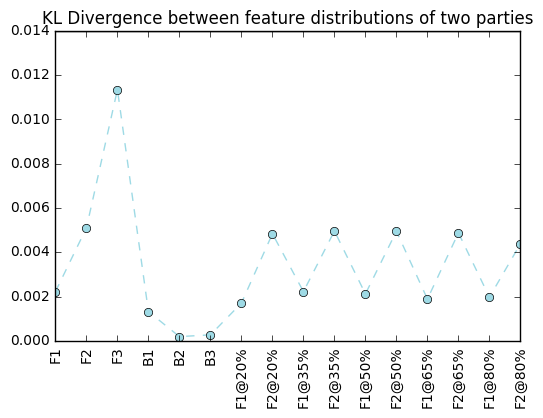

In [18]:
x =['F1','F2','F3','B1', 'B2', 'B3',  'F1@20%', 'F2@20%','F1@35%', 'F2@35%', 'F1@50%', 'F2@50%', 'F1@65%', 'F2@65%', 'F1@80%','F2@80%']
plt.plot(lt,  '--o',color = tableau20[i])
plt.xticks(range(0,16), x, rotation='vertical')
plt.plot([0.014]*16,color = 'k')
plt.title('KL Divergence between feature distributions of two parties')
plt.show()

In [19]:
v_dict = {}
for v in data.vowel.unique():
    data_new = data[data['vowel']==v]
    data_list = []
    for item in ['F1','F2','F3','B1', 'B2', 'B3',  'F1@20%', 'F2@20%','F1@35%', 'F2@35%', 'F1@50%', 'F2@50%', 'F1@65%', 'F2@65%', 'F1@80%','F2@80%']:
    
        F1_1 = data_new[data_new['label']==1][item]
        F1_2 = data_new[data_new['label']==-1][item]

        s1 = np.histogram(F1_1, bins=20,range=(min(F1_1.min(),F1_2.min()), max(F1_1.max(),F1_2.max())))[0]
        s2 = np.histogram(F1_2, bins=20,range=(min(F1_1.min(),F1_2.min()), max(F1_1.max(),F1_2.max())))[0]
        s1[s1==0] = 1
        s2[s2==0] = 1
        data_list.append(st.entropy(s2, s1))
    v_dict[v] = data_list

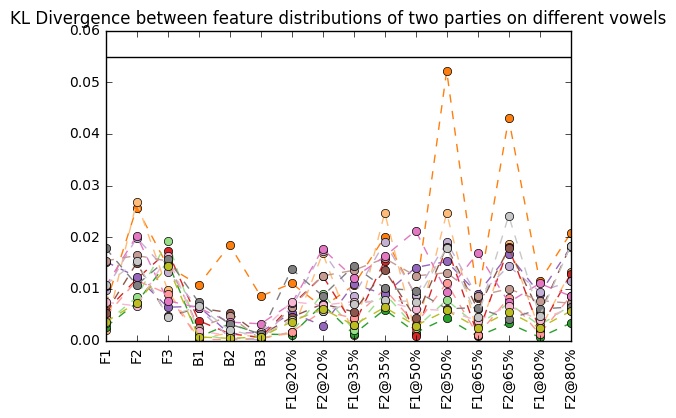

In [23]:
for i,v in enumerate(list(v_dict.keys())): 
    plt.plot(v_dict[v],  '--o',color = tableau20[i+2])
    plt.xticks(range(0,16), x, rotation='vertical')
plt.plot([0.055]*16,color = 'k')
plt.title('KL Divergence between feature distributions of two parties on different vowels')
plt.show()

## Time Series Plotting

In [69]:
time_series = pd.read_csv('./prediction_table.csv')

In [70]:
time_series.head()

,year,session_id,Speaker,Democratic,Republican,label
0,1998,1998_96_1570,JAMESRYOUNG,0.303234,0.696766,-1
1,1998,1998_96_1570,JOHNPAULSTEVENS,0.293852,0.706148,1
2,1998,1998_96_1570,LAWRENCECBROWN,0.299201,0.700799,1
3,1998,1998_96_1793,BETHSBRINKMANN,0.270106,0.729894,1
4,1998,1998_97_1121,HARVEYGROSSMAN,0.294282,0.705718,1


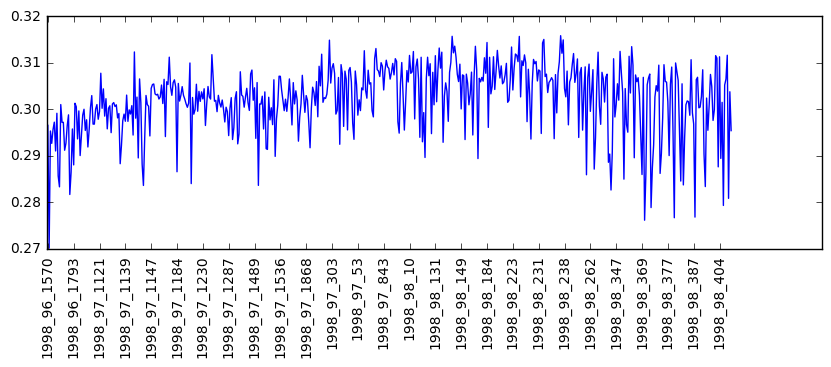

In [76]:
%matplotlib inline
time = D[['session_id','Democratic']].groupby(by = 'session_id').mean().index.values
values = D[['session_id','Democratic']].groupby(by = 'session_id').mean().values
plt.figure(figsize=(10,3))
plt.plot(range(1,531),values)
plt.xticks(np.arange(1, 531, 20.0),time,rotation='vertical')
plt.show()

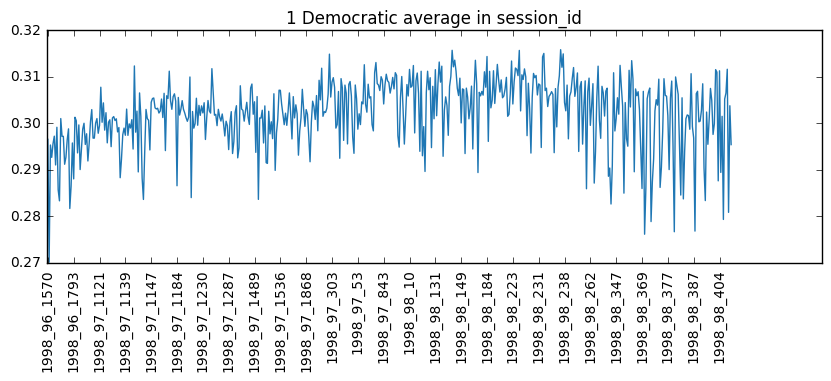

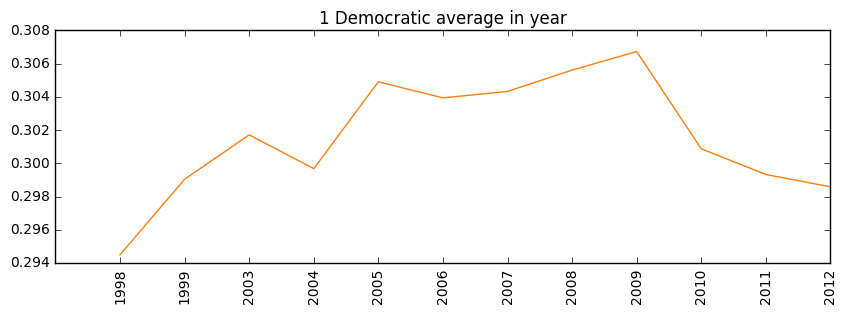

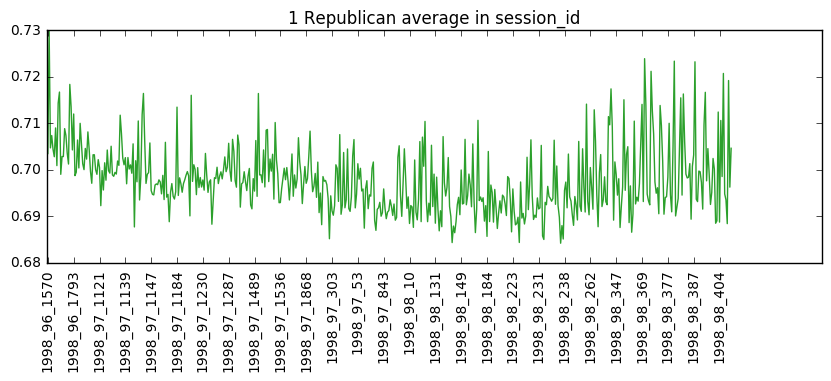

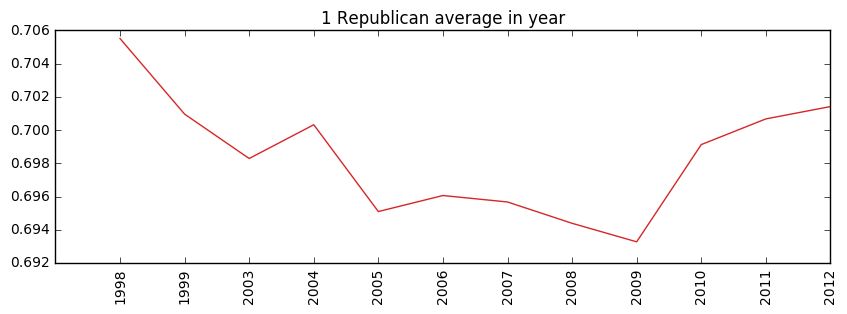

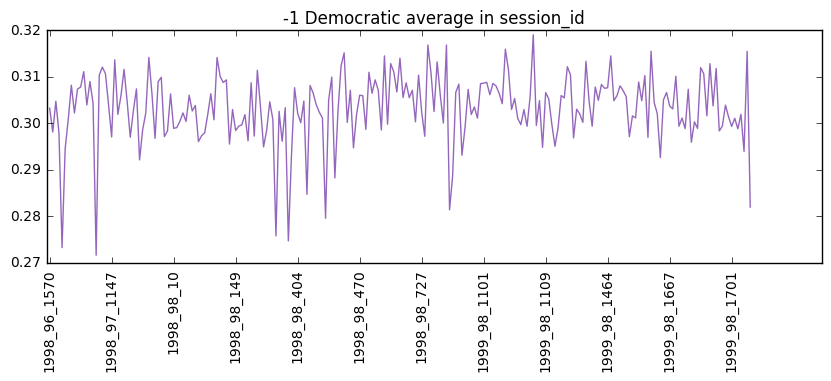

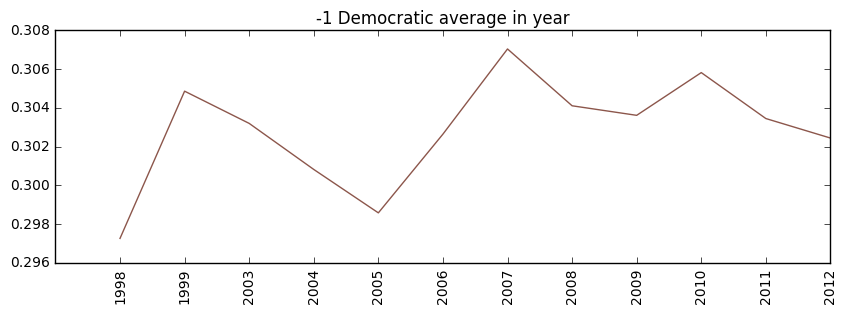

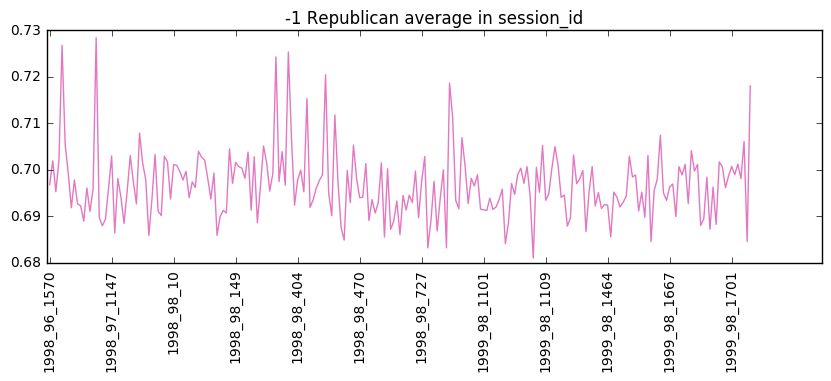

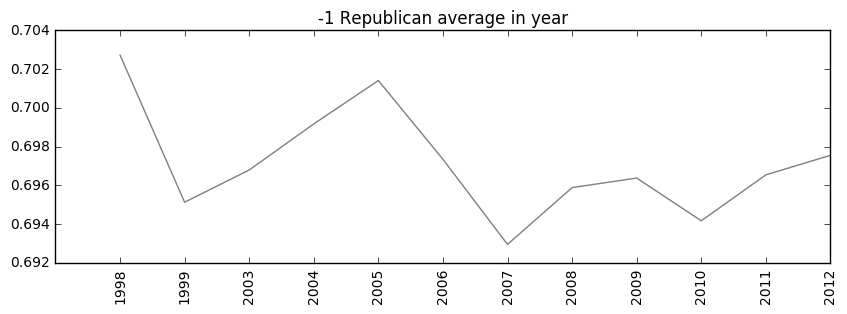

In [86]:
k = 0
for lab in [1,-1]:
    D = time_series[time_series.label==lab]
    for party in ['Democratic','Republican']:
        for group in ['session_id','year']:
            time = D[[group,party]].groupby(by = group).mean().index.values
            values = D[[group,party]].groupby(by = group).mean().values
            plt.figure
            plt.figure(figsize=(10,3))
            plt.plot(range(1,len(values)+1),values,color = tableau20[k])
            if group == 'year':
                plt.xticks(np.arange(1, len(values)+1, 1.0),time,rotation='vertical')
            else:
                plt.xticks(np.arange(1, len(values)+1, 20.0),time,rotation='vertical')
            plt.title(str(lab)+' '+party+' average in '+group)
            k += 2